In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Basic parameters

xmin,xmax = -10,10
ymin,ymax = -10,10
N=100
sigma=4
filename='../img/GradientDescentIllustration.png'

In [4]:
# function and its derivatives
def f(x,y):
    return x*y*norm.pdf(np.sqrt(x**2+y**2),0,sigma)
def fx(x,y):
    return y*norm.pdf(np.sqrt(x**2+y**2),0,sigma)-(x**2)*y/sigma**2*norm.pdf(np.sqrt(x**2+y**2),0,sigma)
def fy(x,y):
    return  x*norm.pdf(np.sqrt(x**2+y**2),0,sigma)-(y**2)*x/sigma**2*norm.pdf(np.sqrt(x**2+y**2),0,sigma)

In [7]:
# Coordinates
x = np.linspace(xmin,xmax,N)
y = np.linspace(ymin,ymax,N)
xx,yy=np.meshgrid(x,y)
zz = f(xx,yy)

In [8]:
# gradient descent algorithm
nu=1
steps=100
x0,y0 = 2.6,2
xs,ys = np.zeros(steps+1),np.zeros(steps+1)
xs[0],ys[0]=x0,y0
for i in range(1,steps+1):
    x1,y1 = x0-nu*fx(x0,y0),y0-nu*fy(x0,y0)
    xs[i],ys[i]=x1,y1
    x0,y0=x1,y1
    

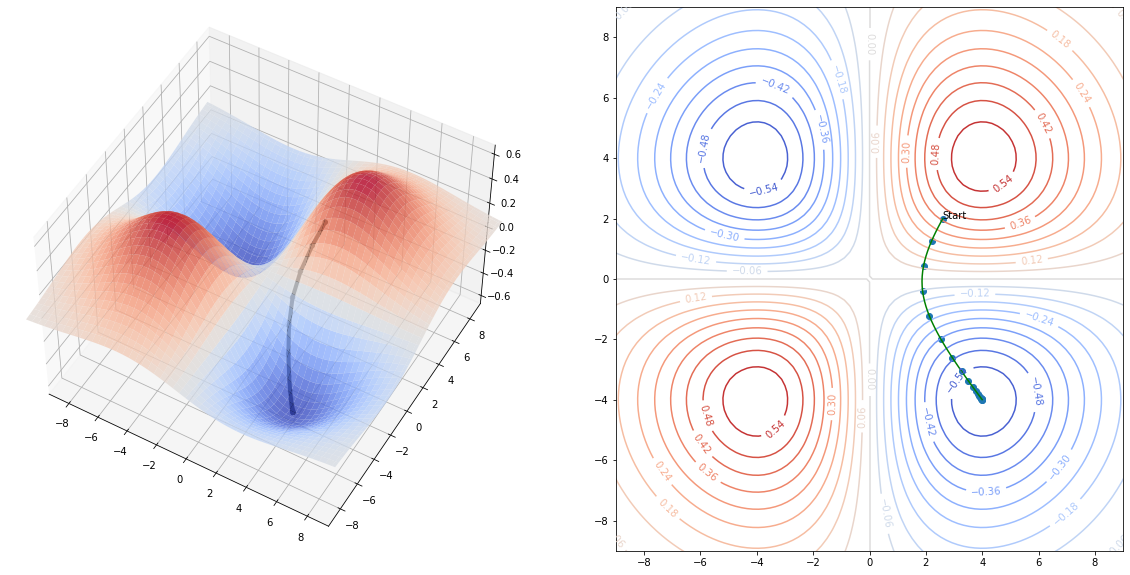

In [10]:
# make the figure
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,2,2)
bx=fig.add_subplot(1,2,1,projection='3d')
ax.set_xlim([xmin+1,xmax-1])
ax.set_ylim([ymin+1,ymax-1])
cs=ax.contour(xx,yy,zz,levels=20,cmap=cm.coolwarm)
ax.clabel(cs)
plot=ax.plot(xs,ys,c='green')
sct=ax.scatter(xs[::5],ys[::5])
ann1=ax.annotate("Start",(xs[0],ys[0]))
bx.set_xlim([xmin+1,xmax-1])
bx.set_ylim([ymin+1,ymax-1])
bx.plot_surface(xx,yy,zz,alpha=.8,cmap=cm.coolwarm)
bx.plot(xs[::5],ys[::5],f(xs[::5],ys[::5]),color='black',linewidth=4)
bx.scatter(xs[::5],ys[::5],f(xs[::5],ys[::5]),color='black')
bx.view_init(elev=50)

In [258]:
# save it to a file
fig.savefig(filename)